In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
housing_owners = pd.read_csv('fema_data/chi_housing_assistance_owners.csv')
housing_owners['zipCode'] = housing_owners['zipCode'].fillna(0).astype(int).astype(str)
housing_renters = pd.read_csv('fema_data/chi_housing_assistance_renters.csv')
housing_renters['zipCode'] = housing_renters['zipCode'].fillna(0).astype(int).astype(str)
housing_renters.head()

,disasterNumber,incidentType,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,...,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,hash,lastRefresh,declarationDate,title,incidentBeginDate,incidentEndDate
0,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60651,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0c2848a1b3d37ca216e40d7266d70007,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
1,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60641,124.0,121.0,121.0,0.0,...,60.0,9.0,1.0,1.0,2c28933c6fcfbd4a651ce9948460ccfd,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
2,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60609,939.0,903.0,903.0,0.0,...,514.0,32.0,5.0,1.0,45fd7be16116532bcb712b0196adfbd2,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
3,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60827,148.0,141.0,141.0,0.0,...,57.0,2.0,0.0,0.0,7001b15646afa6bc79214521253ef5c5,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
4,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60630,11.0,11.0,11.0,0.0,...,1.0,0.0,0.0,0.0,23567187d20f65ae2ba4bb0849a91e0a,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00


In [6]:
housing_owners.shape

(231, 30)

In [7]:
housing_renters.shape

(179, 27)

In [8]:
housing_owners.dtypes

disasterNumber                             float64
incidentType                                object
state                                       object
county                                      object
city                                        object
zipCode                                     object
validRegistrations                         float64
averageFemaInspectedDamage                 float64
totalInspected                             float64
totalDamage                                float64
noFemaInspectedDamage                      float64
femaInspectedDamageBetween1And10000        float64
femaInspectedDamageBetween10001And20000    float64
femaInspectedDamageBetween20001And30000    float64
femaInspectedDamageGreaterThan30000        float64
approvedForFemaAssistance                  float64
totalApprovedIhpAmount                     float64
repairReplaceAmount                        float64
rentalAmount                               float64
otherNeedsAmount               

In [14]:
owner_reg_zip = housing_owners.groupby(['zipCode'])['validRegistrations'].sum()
owner_reg_df = pd.DataFrame(owner_reg_zip).reset_index()
owner_reg_df = owner_reg_df.dropna()
owner_reg_df = owner_reg_df.sort_values(by='validRegistrations',ascending=False)
owner_reg_df.head()

,zipCode,validRegistrations
38,60634,1318.0
40,60637,1227.0
47,60644,1020.0
46,60643,986.0
51,60649,965.0


In [24]:
renter_reg_zip = housing_renters.groupby(['zipCode'])['validRegistrations'].sum()
renter_reg_df = pd.DataFrame(renter_reg_zip).reset_index()
renter_reg_df = renter_reg_df.dropna()
renter_reg_df = renter_reg_df.sort_values(by='validRegistrations',ascending=False)
renter_reg_df.head()

,zipCode,validRegistrations
37,60637,1562.0
11,60609,1554.0
18,60617,1442.0
48,60649,1289.0
43,60643,1157.0


In [31]:
both_reg_df = owner_reg_df.merge(renter_reg_df, on='zipCode')
both_reg_df['validRegistrations'] = both_reg_df['validRegistrations_x'] + both_reg_df['validRegistrations_y']
both_reg_df = both_reg_df[['zipCode', 'validRegistrations']]
both_reg_df = both_reg_df.sort_values(by='validRegistrations', ascending=False)
both_reg_df.head()

,zipCode,validRegistrations
1,60637,2789.0
4,60649,2254.0
3,60643,2143.0
14,60609,2098.0
6,60621,1990.0


In [22]:
flood_zip_df = pd.read_csv('311_data/wib_calls_311_zip.csv')
flood_zip_df = flood_zip_df[flood_zip_df.columns.values[1:]]
flood_zip_stack = pd.DataFrame(flood_zip_df.stack()).reset_index()
flood_zip_stack = flood_zip_stack.rename(columns={'level_0':'Created Date','level_1':'Zip Code',0:'Count Calls'})
flood_zip_sum = flood_zip_stack.groupby(['Zip Code'])['Count Calls'].sum()
flood_zip_sum = flood_zip_sum.reset_index()
flood_zip_sum = flood_zip_sum.sort_values(by='Count Calls',ascending=False)
flood_zip_sum.head()

,Zip Code,Count Calls
27,60628,11671.0
19,60619,10758.0
28,60629,9902.0
17,60617,9526.0
20,60620,9362.0


## FEMA and 311 Comparison

Data doesn't seem to match up cleanly at all in terms of housing assistance registrations for owners and renters vs. 311 calls by zip code. Not sure what the reason for this is

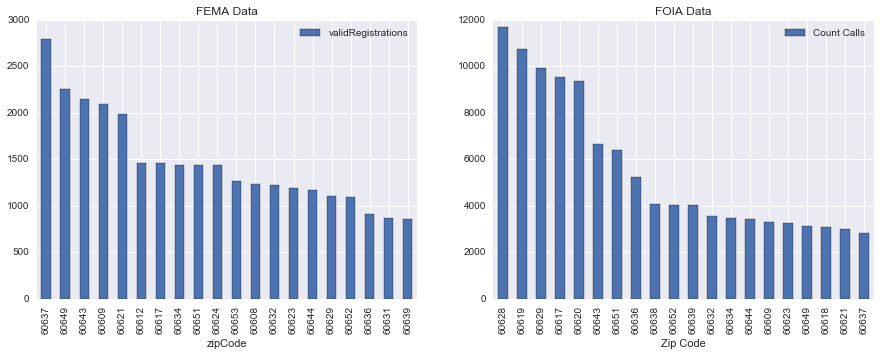

In [32]:
fig, axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15, 5]
both_reg_df[:20].plot(title='FEMA Data', ax=axs[0], kind='bar',x='zipCode',y='validRegistrations')
flood_zip_sum[:20].plot(title='FOIA Data', ax=axs[1], kind='bar',x='Zip Code',y='Count Calls')